# NLP Assignment 1 (40% of grade): Text classification for Fake News Detection

This coursework will involve you implementing functions for a text classifier, which you will train to detect **fake news** in a corpus of approx. 10,000 statements, which will be split into a 80%/20% training/test split. 

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

In [20]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np

In [22]:
def load_dt(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path,encoding="utf8") as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_dt_line(line)
            raw_data.append((text, label))

def split_and_prepro_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))

# Question 1: Input and Basic preprocessing (10 marks)

In [23]:
def convert_lbl(label):
    """Converts the multiple classes into two,
    making it a binary distinction between fake news and real."""
    #return label
    # Converting the multiclass labels to binary label
    labels_map = {
        'true': 'REAL',
        'mostly-true': 'REAL',
        'half-true': 'REAL',
        'false': 'FAKE',
        'barely-true': 'FAKE',
        'pants-fire': 'FAKE'
    }
    return labels_map[label]

def parse_dt_line(line):  
    # Should return a tuple of the label as just FAKE or REAL and the statement
    # e.g. (label, statement)
    """ """
    (label,text) = line[1],line[2]
    label = convert_lbl(label)
    return (label,text)

In [24]:

# Input: a string of one statement
def pre_process(text):
    # Should return a list of tokens
    # DESCRIBE YOUR METHOD IN WORDS
    return text.split()

# Question 2: Basic Feature Extraction (20 marks)

In [25]:
from collections import Counter

In [26]:
global_feature_dict = {} # A global dictionary of features
from collections import Counter
def to_feature_vector(tokens):
    # Should return a dictionary containing features as keys, and weights as values
    # DESCRIBE YOUR METHOD IN WORDS
    
    return dict(Counter(tokens))

In [27]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print(" the Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 3: Cross-validation (20 marks)

In [28]:
#solution
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def cross_vald(dataset, folds):
    results = []
    fold_size = int(len(dataset)/folds) + 1
    
    per = []
    recall = []
    f1score = []
    accu = []
    
    for i in range(0,len(dataset),int(fold_size)):
        # insert code here that trains and tests on the 10 folds of data in the dataset
        print("Fold start on the items %d - %d" % (i, i+fold_size))
        # FILL IN THE METHOD HERE
        test_set = dataset[i:i+fold_size]
        train_set = dataset[:i]+dataset[i+fold_size:]
        
        classifier = train_classifier(train_set)
        y_test = predict_lbls([x[0] for x in test_set],classifier)
        
        true_label = [x[1] for x in test_set]
        output = classification_report(true_label,y_test,output_dict=True)
        accuracy = accuracy_score(true_label, y_test)
        
        accu.append(accuracy)
        per.append(output['FAKE']['precision'])
        recall.append(output['FAKE']['recall'])
        f1score.append(output['FAKE']['f1-score'])
        
        
    return [np.mean(per),np.mean(recall),np.mean(f1score), np.mean(accu)]

In [29]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_lbls(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_lbl_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [30]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'fake_news.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_dt(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the training and the test data...",sep='\n')

split_and_prepro_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples are: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 10241 rawData, 0 trainData, 0 testData
Preparing the training and the test data...
After split, 10241 rawData, 8192 trainData, 2049 testData
Training Samples are: 
8192
Features: 
0


In [31]:
cross_vald(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Fold start on the items 0 - 820
 the Training Classifier...
Fold start on the items 820 - 1640
 the Training Classifier...
Fold start on the items 1640 - 2460
 the Training Classifier...
Fold start on the items 2460 - 3280
 the Training Classifier...
Fold start on the items 3280 - 4100
 the Training Classifier...
Fold start on the items 4100 - 4920
 the Training Classifier...
Fold start on the items 4920 - 5740
 the Training Classifier...
Fold start on the items 5740 - 6560
 the Training Classifier...
Fold start on the items 6560 - 7380
 the Training Classifier...
Fold start on the items 7380 - 8200
 the Training Classifier...


[0.5052295165459777,
 0.49816814029284123,
 0.5013162223569314,
 0.5694791541511475]

# 4. Error Analysis (10 marks)

In [32]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty

def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.1 # Add 0.5 to the bottom
    t -= 0.1 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

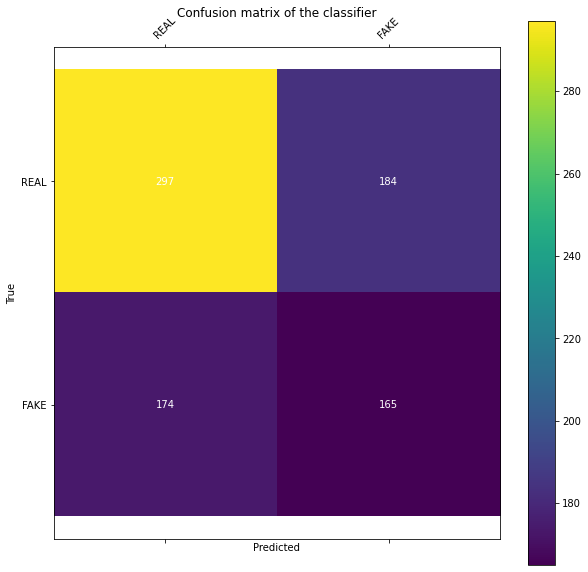

In [33]:
confusion_matrix_heatmap(y_test=true_label, preds = y_test, labels=labels)

In [34]:
test_set = train_data[0:0+820]
train_set = train_data[:0]+train_data[0+820:]

classifier = train_classifier(train_set)
y_test = predict_lbls([x[0] for x in test_set],classifier)

true_label = [x[1] for x in test_set]

output = classification_report(true_label,y_test)

labels=['REAL','FAKE']

 the Training Classifier...


In [35]:
false_positive, false_negative, idx = 0,0,0

false_positive_index, false_negative_index = [],[]

for pred, true in zip(y_test,true_label):
    
    if pred=='FAKE' and true=='REAL':
        false_positive += 1
        false_positive_index.append(idx)
        
    if pred=='REAL' and true=='FAKE':
        false_negative += 1
        false_negative_index.append(idx)        
    idx += 1

print(f'the false positive index: {false_positive_index[:3]}')
print(f'the false negative index: {false_negative_index[:3]}')

the false positive index: [1, 4, 7]
the false negative index: [6, 12, 14]


In [36]:
print('*************False Positive:*******************')
print(f'{raw_data[1]} Model predicted: {y_test[1]}',end='\n\n')
print(f'{raw_data[4]} Model predicted: {y_test[4]}',end='\n\n')
print(f'{raw_data[7]} Model predicted: {y_test[7]}',end='\n'*3)

print('**************False Negative:******************')
print(f'{raw_data[6]} Model predicted: {y_test[6]}',end='\n\n')
print(f'{raw_data[12]} Model predicted: {y_test[12]}',end='\n\n')
print(f'{raw_data[14]} Model predicted: {y_test[14]}',end='\n')

*************False Positive:*******************
('When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.', 'REAL') Model predicted: FAKE

('The economic turnaround started at the end of my term.', 'REAL') Model predicted: FAKE

("I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.", 'REAL') Model predicted: FAKE


**************False Negative:******************
('Jim Dunnam has not lived in the district he represents for years now.', 'FAKE') Model predicted: REAL

('When Mitt Romney was governor of Massachusetts, we didnt just slow the rate of growth of our government, we actually cut it.', 'FAKE') Model predicted: REAL

('Most of the (Affordable Care Act) has already in some sense been waived or otherwise suspended.', 'FAKE') Model predicted: REAL


In [23]:
[ ]

[]

# Questions 5 (20%) and 6 (20%) (recommend starting a new notebook)